# CIFAR-10 Dataset

Loading the dataset

In [1]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Printing the shape of the training and testing images

In [2]:
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


Printing the shape of the labels



In [3]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

Printing the total number of classes (the unique numbers from the train labels)

In [4]:
import numpy as np

classes = np.unique(y_train)
nClasses = len(classes)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Creating a dictionary with the names of the classes

In [5]:
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

Displaying the first image in the training and the test data

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


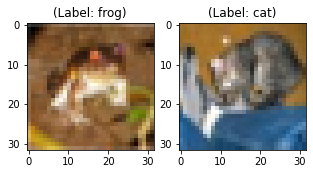

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=[5,5])

# Display the first image in training data
index = 0
plt.subplot(121)
curr_img = np.reshape(x_train[index], (32,32,3))
plt.imshow(curr_img)
curr_label = str(label_dict[y_train[index][0]])
print(plt.title('(Label: {})'.format(curr_label)))

# Display the first image in testing data
index = 0
plt.subplot(122)
curr_img = np.reshape(x_test[index],(32,32,3))
plt.imshow(curr_img)
curr_label = str(label_dict[y_test[index][0]])
print(plt.title('(Label: {})'.format(curr_label)))

## Visualizing the data

Checking the minimum and the maximum values of the training images

In [7]:
np.min(x_train),np.max(x_train)

(0, 255)

Normalizing the pixels between 0 and 1 inclusive

In [8]:
x_train_normalized = x_train/np.max(x_train)

np.min(x_train_normalized),np.max(x_train_normalized)

(0.0, 1.0)

In [9]:
x_train_normalized.shape

(50000, 32, 32, 3)

Reshaping the image dimensions from three to one (flattening the images)

In [10]:
from functools import reduce

n_cols = reduce((lambda x, y: x * y), x_train_normalized.shape[1:])
print(n_cols)

x_train_flat = x_train_normalized.reshape(-1, n_cols)
x_train_flat.shape

3072


(50000, 3072)

Creating a DataFrame that holds the pixel values of the images with their respective labels in a row-column format

The shape should be (50000, 3073) (3072+1 because of the added labels) 

In [11]:
feat_cols = ['pixel{}'.format(str(i)) for i in range(x_train_flat.shape[1])]

import pandas as pd

df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)

df_cifar['label'] = y_train
df_cifar.shape

(50000, 3073)

In [12]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel3033,pixel3034,pixel3035,pixel3036,pixel3037,pixel3038,pixel3039,pixel3040,pixel3041,pixel3042,pixel3043,pixel3044,pixel3045,pixel3046,pixel3047,pixel3048,pixel3049,pixel3050,pixel3051,pixel3052,pixel3053,pixel3054,pixel3055,pixel3056,pixel3057,pixel3058,pixel3059,pixel3060,pixel3061,pixel3062,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,0.211765,0.164706,0.384314,0.286275,0.203922,0.466667,0.356863,0.247059,0.545098,0.419608,0.294118,0.568627,0.431373,0.313725,0.584314,0.458824,0.349020,0.584314,0.470588,0.364706,0.513725,0.403922,0.301961,0.490196,0.388235,0.298039,0.556863,0.450980,0.356863,0.564706,...,0.580392,0.403922,0.301961,0.631373,0.411765,0.270588,0.564706,0.372549,0.215686,0.439216,0.352941,0.231373,0.466667,0.356863,0.227451,0.509804,0.376471,0.254902,0.470588,0.341176,0.231373,0.360784,0.262745,0.180392,0.403922,0.305882,0.223529,0.666667,0.549020,0.407843,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,0.396078,0.388235,0.490196,0.513725,0.545098,0.607843,0.650980,0.705882,0.674510,0.745098,0.823529,0.705882,0.780392,0.839216,0.556863,0.611765,0.611765,0.435294,0.470588,0.431373,0.415686,0.419608,0.384314,0.427451,0.407843,0.400000,0.482353,0.474510,0.458824,0.498039,...,0.019608,0.023529,0.043137,0.023529,0.023529,0.043137,0.039216,0.035294,0.047059,0.098039,0.086275,0.086275,0.200000,0.176471,0.164706,0.266667,0.250980,0.262745,0.352941,0.352941,0.396078,0.454902,0.443137,0.478431,0.525490,0.498039,0.521569,0.549020,0.509804,0.533333,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.298039,0.352941,0.352941,0.282353,0.337255,0.337255,0.250980,0.305882,0.305882,0.250980,0.305882,0.305882,0.270588,0.325490,0.325490,0.258824,0.313725,0.313725,0.215686,0.270588,0.270588,0.203922,0.258824,0.258824,0.227451,0.282353,0.282353,0.266667,0.313725,0.309804,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,0.145098,0.090196,0.172549,0.152941,0.098039,0.156863,0.145098,0.086275,0.156863,0.149020,0.090196,0.094118,0.090196,0.035294,0.125490,0.098039,0.058824,0.168627,0.105882,0.074510,0.117647,0.078431,0.039216,0.125490,0.117647,0.066667,0.160784,0.145098,0.090196,0.203922,...,0.478431,0.388235,0.262745,0.419608,0.333333,0.211765,0.439216,0.376471,0.258824,0.360784,0.317647,0.207843,0.313725,0.243137,0.152941,0.376471,0.305882,0.231373,0.301961,0.262745,0.164706,0.333333,0.298039,0.172549,0.329412,0.294118,0.188235,0.262745,0.223529,0.149020,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,0.756863,0.827451,0.709804,0.768627,0.854902,0.694118,0.764706,0.862745,0.709804,0.764706,0.874510,0.721569,0.752941,0.874510,0.741176,0.745098,0.874510,0.741176,0.741176,0.870588,0.737255,0.756863,0.878431,0.717647,0.760784,0.874510,0.713725,0.760784,0.874510,0.721569,...,0.364706,0.384314,0.400000,0.352941,0.372549,0.

PCA - keeping 3 components, then applying `fit_transform` on the training data

In [13]:
from sklearn.decomposition import PCA

pca_cifar = PCA(n_components=3)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

Converting from a numpy array to a pandas DataFrame

In [14]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_cifar_Df['y'] = y_train

principal_cifar_Df.head()

,principal component 1,principal component 2,principal component 3,y
0,-6.401018,2.729039,1.501712,6
1,0.829783,-0.949943,6.003750,9
2,7.730200,-11.522102,-2.753618,9
3,-10.347817,0.010738,1.101019,4
4,-2.625651,-4.969240,1.034577,1


Printing the **variance**

In [15]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained variation per principal component: [0.2907663  0.11253144 0.06694414]


Visualizing the CIFAR-10 data in two-dimensions using PC1 and PC2

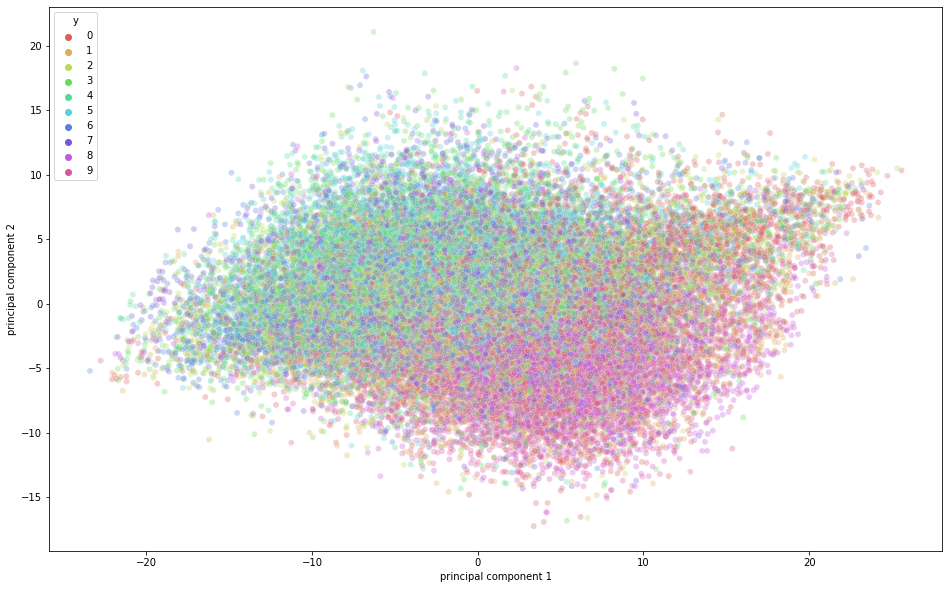

In [16]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='principal component 1', y='principal component 2',
    hue="y",
    palette=sns.color_palette('hls', 10),
    data=principal_cifar_Df,
    legend='full',
    alpha=0.3
)

Plot for PC2 vs PC3

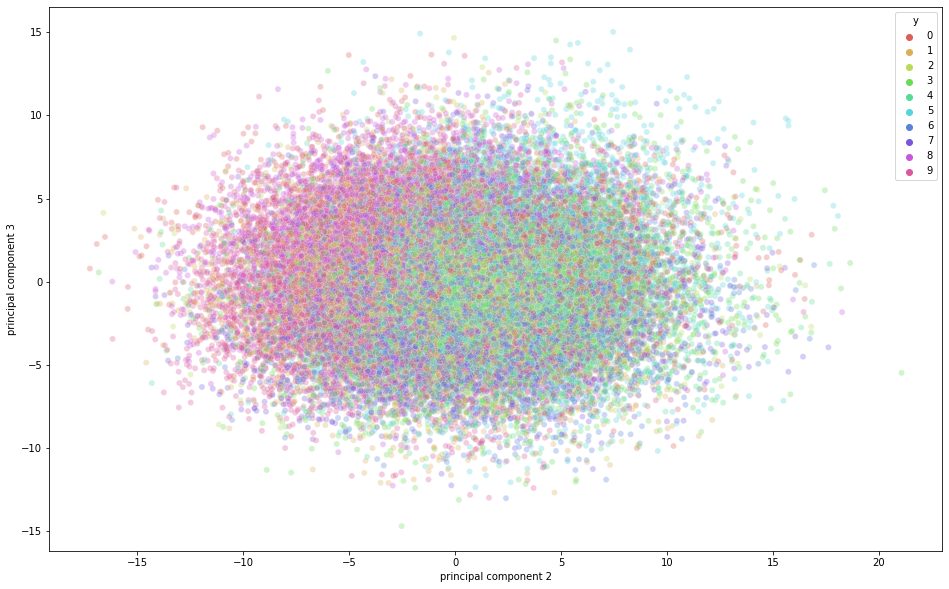

In [17]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='principal component 2', y='principal component 3',
    hue="y",
    palette=sns.color_palette('hls', 10),
    data=principal_cifar_Df,
    legend='full',
    alpha=0.3
)

## Speed Up Deep Learning Training using PCA with CIFAR - 10 Dataset

In [18]:
x_test = x_test/255.0
x_test = x_test.reshape(-1,32,32,3)

x_test_flat = x_test.reshape(-1,3072)

In [19]:
pca = PCA(0.9)

pca.fit(x_train_flat)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
pca.n_components_

99

In [21]:
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import RMSprop

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [23]:
batch_size = 128
num_classes = 10
epochs = 20

In [24]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(99,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              102400    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 1,810,698
Trainable params: 1,810,698
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

Epoch 1/20
391/391 [==============================] - 4s 5ms/step - loss: 1.8040 - accuracy: 0.3600 - val_loss: 1.4439 - val_accuracy: 0.4932
Epoch 2/20
391/391 [==============================] - 1s 3ms/step - loss: 1.3346 - accuracy: 0.5261 - val_loss: 1.4278 - val_accuracy: 0.5033
Epoch 3/20
391/391 [==============================] - 1s 3ms/step - loss: 1.1405 - accuracy: 0.5919 - val_loss: 1.3163 - val_accuracy: 0.5308
Epoch 4/20
391/391 [==============================] - 1s 3ms/step - loss: 0.9693 - accuracy: 0.6545 - val_loss: 1.3583 - val_accuracy: 0.5452
Epoch 5/20
391/391 [==============================] - 1s 3ms/step - loss: 0.8154 - accuracy: 0.7099 - val_loss: 1.3888 - val_accuracy: 0.5546
Epoch 6/20
391/391 [==============================] - 1s 3ms/step - loss: 0.6754 - accuracy: 0.7561 - val_loss: 1.5320 - val_accuracy: 0.5432
Epoch 7/20
391/391 [==============================] - 1s 3ms/step - loss: 0.5411 - accuracy: 0.8032 - val_loss: 1.6904 - val_accuracy: 0.5489
Epoch 

In [26]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_flat, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(x_test_flat, y_test))

Epoch 1/20
391/391 [==============================] - 3s 6ms/step - loss: 2.8014 - accuracy: 0.1795 - val_loss: 1.9003 - val_accuracy: 0.3234
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 1.8648 - accuracy: 0.3298 - val_loss: 1.7376 - val_accuracy: 0.3781
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 1.7531 - accuracy: 0.3742 - val_loss: 1.7676 - val_accuracy: 0.3549
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 1.6840 - accuracy: 0.3993 - val_loss: 1.6460 - val_accuracy: 0.4017
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 1.6293 - accuracy: 0.4155 - val_loss: 1.7448 - val_accuracy: 0.3872
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 1.5768 - accuracy: 0.4367 - val_loss: 1.7838 - val_accuracy: 0.3891
Epoch 7/20
391/391 [==============================] - 2s 5ms/step - loss: 1.5515 - accuracy: 0.4488 - val_loss: 1.6249 - val_accuracy: 0.4347
Epoch 